# A1Q1 cmpt423
Hongyi Xue
hox294
11187674

1. Create a new dataset using model parameters(most are constant)

In [1]:
import numpy.random as nprand
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


d_list = []
acc_list = []

for d in range(0,6):
    theta_c0 = 0.6
    theta_c1 = 1 - theta_c0
    #theta_f1_c0 = 0.1
    #theta_f0_c0 = 1 - theta_f1_c0

    #theta_f1_c1 = 0.9
    #theta_f0_c1 = 1 - theta_f1_c1

    theta_f0_c0 = 0.5 + (d/10) #not fixed
    theta_f0_c1 = 1 - theta_f0_c0 #d vary from 0 to 1
    
    theta_f1_c0 = 1 - theta_f0_c0
    theta_f1_c1 = 1 - theta_f0_c1

    theta_h1_c0 = 0.3
    theta_h0_c0 = 1-theta_h1_c0
    theta_h1_c1 = 0.4
    theta_h0_c1 = 1-theta_h1_c1

    coin_sample = nprand.binomial(1, theta_c1)

    N = 1000
    Coins = nprand.binomial([1 for i in range (N)], theta_c1)

    flip1 = nprand.binomial(1, theta_f1_c0)

    flip2 = nprand.binomial(1, theta_f1_c1)

    def bin_choose(c, theta_0, theta_1):
        if c == 0:
            return theta_0
        else:
            return theta_1

    Flips = np.array([nprand.binomial(1, bin_choose(c, theta_f1_c0, theta_f1_c1)) for c in Coins])
    Hats = np.array([nprand.binomial(1, bin_choose(c, theta_h1_c0, theta_h1_c1)) for c in Coins])
    
    data = {'Flip' : [x for x in Flips], 
            'Hat'  : [x for x in Hats], 
            'Coin' : Coins}
    coindata = pd.DataFrame(data)
    
    coindata.describe()
    coindata.plot.density()
    plt.show()
    coindata.cov()
    cov = coindata.cov()
    cov.style.background_gradient().set_precision(3)
    coindata.to_csv('coindata.csv')
    df = pd.read_csv('coindata.csv', index_col=0)
    df.describe()
    
    clf = BernoulliNB()

    features = df[['Flip', 'Hat']]
    labels = df['Coin']
    clf.fit(features, labels)

    theta_coin = [math.exp(x) for x in clf.class_log_prior_]
    feature_parameters = np.exp(clf.feature_log_prob_)
    cvs = cross_val_score(clf, features, labels, cv=10)
    print(cvs)
    print(np.mean(cvs))

    print("Accuracy", accuracy_score(labels, clf.predict(features)))
    acc_list.append(accuracy_score(labels, clf.predict(features)))
    d_list.append((d/5))


<Figure size 640x480 with 1 Axes>

[0.61386139 0.61386139 0.62       0.62       0.62       0.62
 0.62       0.62       0.61616162 0.61616162]
0.6180046004600459
Accuracy 0.618


<Figure size 640x480 with 1 Axes>

[0.58415842 0.54455446 0.62376238 0.61386139 0.64356436 0.57575758
 0.58585859 0.63636364 0.60606061 0.61616162]
0.6030103010301031
Accuracy 0.611


<Figure size 640x480 with 1 Axes>

[0.66336634 0.67326733 0.67       0.74       0.58       0.69
 0.67       0.72       0.6969697  0.60606061]
0.6709663966396641
Accuracy 0.671


<Figure size 640x480 with 1 Axes>

[0.72277228 0.78217822 0.83168317 0.78       0.85       0.83
 0.8        0.86868687 0.74747475 0.82828283]
0.8041078107810782
Accuracy 0.804


<Figure size 640x480 with 1 Axes>

[0.88118812 0.9009901  0.93069307 0.89       0.85       0.84
 0.82       0.85858586 0.87878788 0.88888889]
0.873913391339134
Accuracy 0.874


<Figure size 640x480 with 1 Axes>

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
Accuracy 1.0


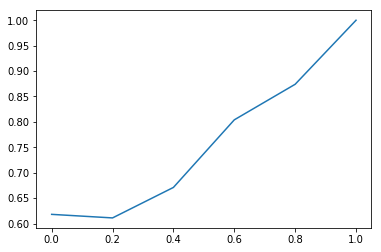

In [2]:
plt.plot(d_list, acc_list)

We can see that overall the accuracy increases as d vary from 0.0 to 1.0.

Specifically, when d = {0.0, 0.2}, the accuracy does not change much. When d = {1.0, 4.0}, the accuracy increase significantly.

I think the reason why accuracy increase is because that when f00 f01 both equal to 0.5, we are choosing the coin completely randomly. When d becomes larger and larger, we are more and more certain about which coin are we choosing, so that the prediction accuracy becomes higher and higher. When d=1.0, f00=1.0; f01=0.0, we only choose coin 0, therefore the accuracy becomes almost 100%.